<a href="https://colab.research.google.com/github/Spencer166/Capstone/blob/main/Step_4_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Dataset into DataFrame

In [1]:
import pandas as pd

# Replace 'file_path.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/loan_data.csv'

# Now, let's read the CSV file into a DataFrame using pandas
# The read_csv() function is used for reading the data
# We'll store the data in a variable called 'df' (short for DataFrame)
df = pd.read_csv(file_path)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Unique Values in Categorical Columns
print("\nNumber of Unique Values in Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col, ": ", df[col].nunique())

# Distribution of categorical variable 'purpose'
print("\nDistribution of 'purpose' variable:")
print(df['purpose'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None

Number of Unique Values in Categorical Col

Statistical Summary for Numerical Columns

In [3]:
import seaborn as sns

# Compute summary statistics for numerical columns
numerical_summary = df.describe().transpose()

# Define color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Define a function to apply background gradient
def apply_gradient(s):
    return [f'background-color: {palette(s)}' for s in s]

# Apply background gradient using Styler.apply()
styled_summary = numerical_summary.style.apply(apply_gradient)

# Display the styled summary statistics
styled_summary

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.000000,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000
int.rate,9578.000000,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,0.216400
installment,9578.000000,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,940.140000
log.annual.inc,9578.000000,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,14.528354
dti,9578.000000,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,29.960000
fico,9578.000000,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,827.000000
days.with.cr.line,9578.000000,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,17639.958330
revol.bal,9578.000000,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1207359.000000
revol.util,9578.000000,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,119.000000
inq.last.6mths,9578.000000,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,33.000000


Class Distribution Analysis

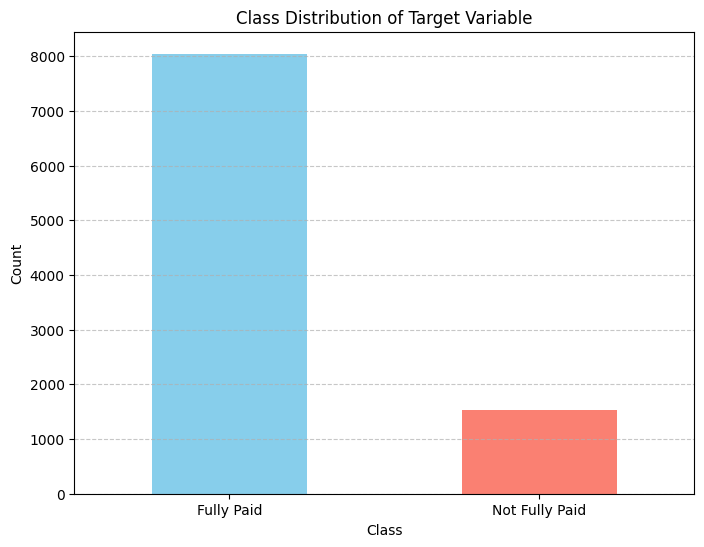

In [4]:
import matplotlib.pyplot as plt

# Class distribution of the target variable
class_distribution = df['not.fully.paid'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fully Paid', 'Not Fully Paid'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

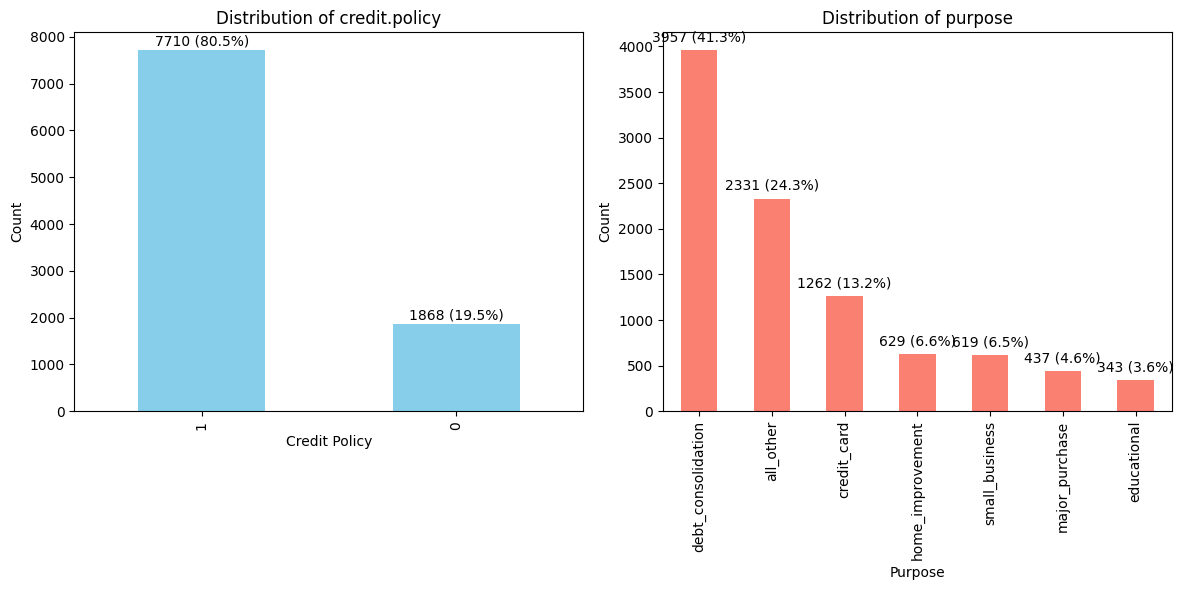

In [5]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart for distribution of 'credit.policy'
plt.subplot(1, 2, 1)
df['credit.policy'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of credit.policy')
plt.xlabel('Credit Policy')
plt.ylabel('Count')

# Add percentage labels on top of each bar
total_credit_policy = len(df['credit.policy'])
for i, count in enumerate(df['credit.policy'].value_counts()):
    plt.text(i, count + total_credit_policy * 0.01, f'{count} ({count / total_credit_policy:.1%})', ha='center')

# Plot bar chart for distribution of 'purpose'
plt.subplot(1, 2, 2)
df['purpose'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')

# Add percentage labels on top of each bar
total_purpose = len(df['purpose'])
for i, count in enumerate(df['purpose'].value_counts()):
    plt.text(i, count + total_purpose * 0.01, f'{count} ({count / total_purpose:.1%})', ha='center')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Conversion of Features to Boolean Type

In [6]:
# Convert 'credit.policy' feature to boolean type
df['credit.policy'] = df['credit.policy'].astype(bool)

# Convert 'not.fully.paid' feature to boolean type
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)

# Display the first few rows of the dataset to verify the changes
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,True,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False
1,True,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False
2,True,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False
3,True,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False
4,True,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False


Sorting Unique Values

In [7]:
# Features of interest
features_of_interest = ['inq.last.6mths', 'delinq.2yrs', 'pub.rec']

# Dictionary to store unique values and their percentages
unique_values_with_percentage = {}

# Calculate unique values and their percentages for each feature
for feature in features_of_interest:
    # Calculate unique values and their counts
    unique_values_count = df[feature].value_counts().sort_index()
    # Calculate percentages for each value
    percentages = (unique_values_count / df.shape[0]) * 100
    # Store unique values and their percentages in the dictionary
    unique_values_with_percentage[feature] = {'unique_values': unique_values_count.index.tolist(),
                                              'percentages': percentages.tolist()}

# Print the sorted unique values and their percentages for each feature
for feature, values_percentage in unique_values_with_percentage.items():
    print(f"Feature: {feature}")
    print("Unique Values: ", values_percentage['unique_values'])
    print("Percentages: ", values_percentage['percentages'])
    print()

Feature: inq.last.6mths
Unique Values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 24, 25, 27, 28, 31, 32, 33]
Percentages:  [37.97243683441219, 25.70474002923366, 14.449780747546463, 9.020672374190854, 4.959281687199833, 2.902484861140113, 1.7226978492378369, 1.044059302568386, 0.7517226978492378, 0.49070787220714135, 0.24013363959072875, 0.15660889538525788, 0.15660889538525788, 0.06264355815410315, 0.06264355815410315, 0.09396533723115473, 0.031321779077051574, 0.02088118605136772, 0.04176237210273544, 0.02088118605136772, 0.01044059302568386, 0.02088118605136772, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386, 0.01044059302568386]

Feature: delinq.2yrs
Unique Values:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13]
Percentages:  [88.30653581123407, 8.68657339736897, 2.0045938609313008, 0.6786385466694509, 0.1983712674879933, 0.06264355815410315, 0.02088118605136772, 0.01044059302568386, 0.01044059302568386

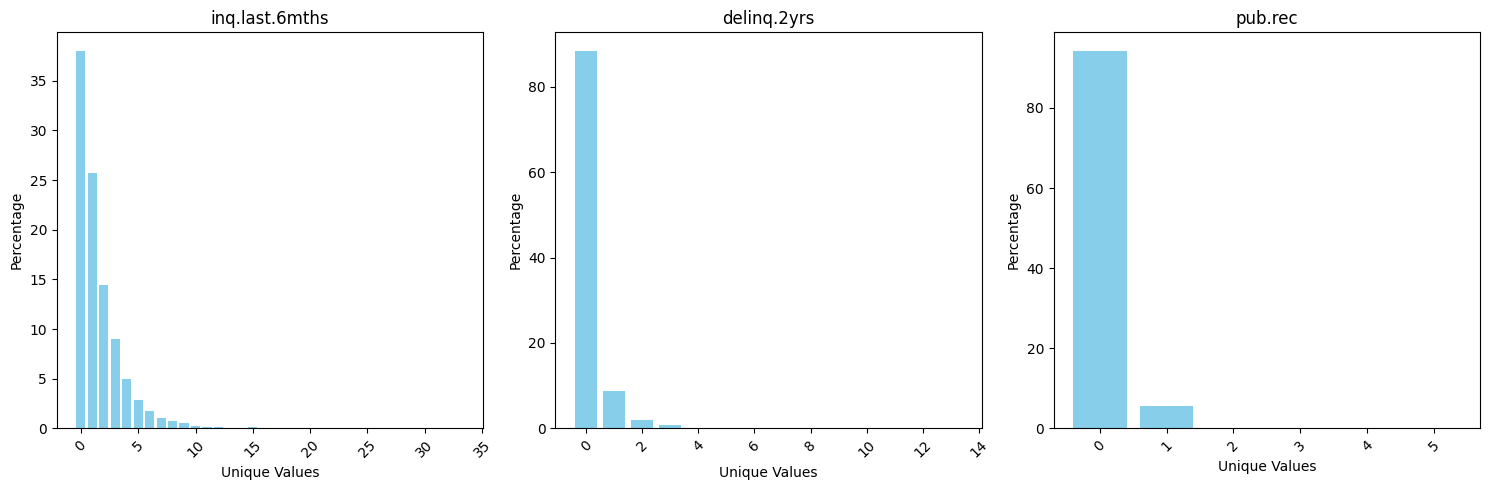

In [8]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 5))

# Iterate over each feature
for i, (feature, values_percentage) in enumerate(unique_values_with_percentage.items(), start=1):
    # Create subplot
    plt.subplot(1, len(features_of_interest), i)

    # Plot bar chart
    plt.bar(values_percentage['unique_values'], values_percentage['percentages'], color='skyblue')

    # Set title and labels
    plt.title(feature)
    plt.xlabel('Unique Values')
    plt.ylabel('Percentage')

    # Rotate x-axis labels if too crowded
    if len(values_percentage['unique_values']) > 5:
        plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Custom Binning Method

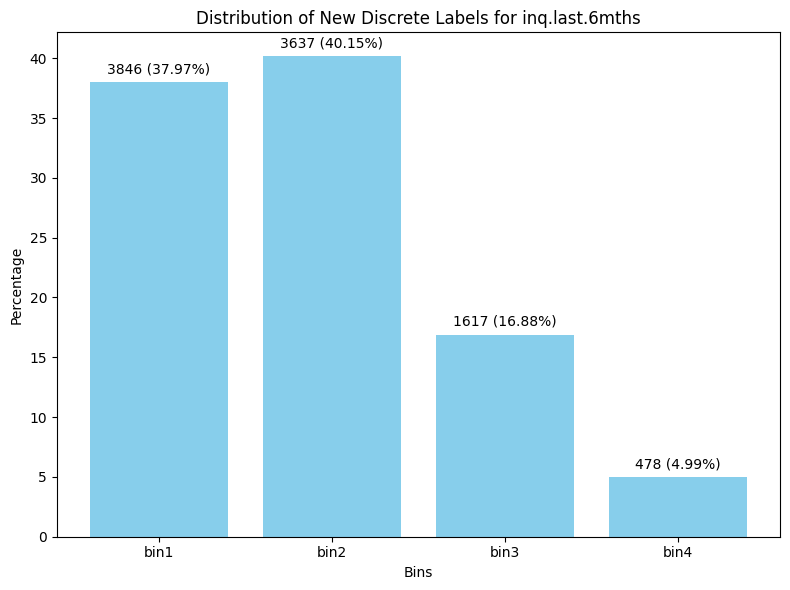

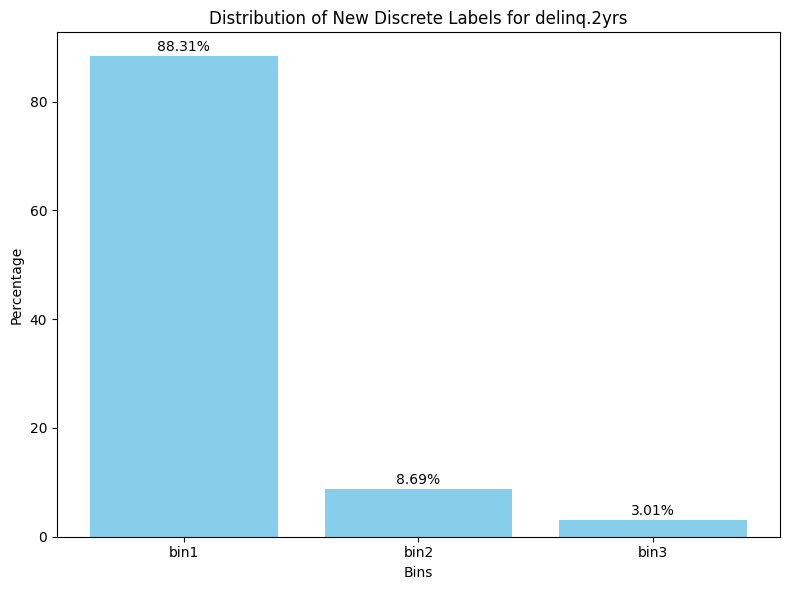

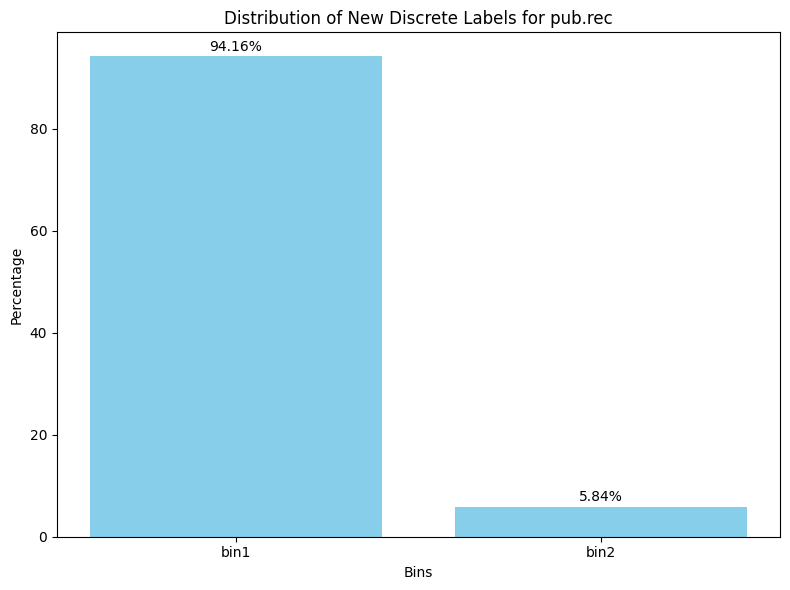

In [9]:
import matplotlib.pyplot as plt

# Define custom binning function
def custom_binning(value):
    if value == 0:
        return 'bin1'
    elif value in [1, 2]:
        return 'bin2'
    elif value in [3, 4, 5]:
        return 'bin3'
    else:
        return 'bin4'

# Apply custom binning function to 'inq.last.6mths' feature
df['inq_bin'] = df['inq.last.6mths'].apply(custom_binning)

# Calculate distribution of new discrete labels
inq_bin_distribution = df['inq_bin'].value_counts(normalize=True) * 100

# Sort the bins by their names
inq_bin_distribution_sorted = inq_bin_distribution.sort_index()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(inq_bin_distribution_sorted.index, inq_bin_distribution_sorted.values, color='skyblue')

# Add counts and percentages as text on top of each bar
for bar, count, percentage in zip(bars, df['inq_bin'].value_counts(), inq_bin_distribution_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{count} ({percentage:.2f}%)",
             ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of New Discrete Labels for inq.last.6mths')
plt.xlabel('Bins')
plt.ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()

# Define custom binning function for 'delinq.2yrs' feature
def custom_binning_delinq(value):
    if value == 0:
        return 'bin1'
    elif value == 1:
        return 'bin2'
    else:
        return 'bin3'

# Apply custom binning function to 'delinq.2yrs' feature
df['delinq_bin'] = df['delinq.2yrs'].apply(custom_binning_delinq)

# Calculate distribution of new discrete labels
delinq_bin_distribution = df['delinq_bin'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(delinq_bin_distribution.index, delinq_bin_distribution.values, color='skyblue')

# Add percentages as text on top of each bar
for bar, percentage in zip(bars, delinq_bin_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of New Discrete Labels for delinq.2yrs')
plt.xlabel('Bins')
plt.ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()

# Define custom binning function for 'pub.rec' feature
def custom_binning_pubrec(value):
    if value == 0:
        return 'bin1'
    else:
        return 'bin2'

# Apply custom binning function to 'pub.rec' feature
df['pubrec_bin'] = df['pub.rec'].apply(custom_binning_pubrec)

# Calculate distribution of new discrete labels
pubrec_bin_distribution = df['pubrec_bin'].value_counts(normalize=True) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(pubrec_bin_distribution.index, pubrec_bin_distribution.values, color='skyblue')

# Add percentages as text on top of each bar
for bar, percentage in zip(bars, pubrec_bin_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of New Discrete Labels for pub.rec')
plt.xlabel('Bins')
plt.ylabel('Percentage')

# Show plot
plt.tight_layout()
plt.show()

Identification of Records with Values Over 100% in 'revol.util' Feature

In [10]:
# Filter records where 'revol.util' is greater than 100%
over_100_util_records = df[df['revol.util'] > 100]

# Add row numbers to the DataFrame after resetting the index
over_100_util_records.insert(0, 'Row Number', over_100_util_records.index + 1)

# Reset the index to remove the default index and avoid duplicates
over_100_util_records.reset_index(drop=True, inplace=True)

# Define a function to apply purple color to 'revol.util'
def highlight_revol_util(column):
    if column.name == 'revol.util':
        return ['background-color: purple'] * len(column)
    else:
        return [''] * len(column)

# Apply the styling to the DataFrame
styled_table = over_100_util_records.style.apply(highlight_revol_util)

styled_table

,Row Number,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,inq_bin,delinq_bin,pubrec_bin
0,7778,False,credit_card,0.143800,42.960000,9.210340,5.640000,632,660.000000,1269,105.700000,1,0,0,False,bin2,bin1,bin1
1,7896,False,debt_consolidation,0.143800,149.480000,9.852194,13.450000,642,1139.000000,2422,105.300000,3,0,0,False,bin3,bin1,bin1
2,7915,False,debt_consolidation,0.118600,23.210000,10.060491,11.330000,657,2879.958333,4479,101.800000,1,0,0,True,bin2,bin1,bin1
3,7923,False,credit_card,0.143800,359.950000,11.245046,9.980000,642,4679.958333,15918,101.400000,6,0,0,True,bin4,bin1,bin1
4,7924,False,all_other,0.093300,287.590000,9.615805,13.360000,717,3268.958333,2588,103.500000,0,0,0,True,bin1,bin1,bin1
5,7958,False,debt_consolidation,0.178600,88.410000,10.915088,9.620000,612,1230.000000,1190,119.000000,15,0,0,False,bin4,bin1,bin1
6,7983,False,credit_card,0.143800,137.450000,9.615805,16.320000,647,1049.000000,4364,101.500000,5,0,0,True,bin3,bin1,bin1
7,7992,False,all_other,0.099600,51.600000,9.798127,10.330000,682,2910.000000,6646,100.700000,1,0,0,True,bin2,bin1,bin1
8,8057,False,all_other,0.105900,78.110000,10.032408,5.700000,672,3150.041667,3613,103.200000,1,1,0,False,bin2,bin2,bin1
9,8074,False,educational,0.137500,495.520000,11.338572,19.100000,662,6660.041667,26710,102.700000,3,0,0,False,bin3,bin1,bin1


In [11]:
# Filter records where 'revol.util' is greater than 100%
over_100_util_records_index = df.index[df['revol.util'] > 100]

# Update the values to 100
df.loc[over_100_util_records_index, 'revol.util'] = 100

# Display the modified records
print(df.loc[over_100_util_records_index])

      credit.policy             purpose  int.rate  installment  \
7777          False         credit_card    0.1438        42.96   
7895          False  debt_consolidation    0.1438       149.48   
7914          False  debt_consolidation    0.1186        23.21   
7922          False         credit_card    0.1438       359.95   
7923          False           all_other    0.0933       287.59   
7957          False  debt_consolidation    0.1786        88.41   
7982          False         credit_card    0.1438       137.45   
7991          False           all_other    0.0996        51.60   
8056          False           all_other    0.1059        78.11   
8073          False         educational    0.1375       495.52   
8091          False  debt_consolidation    0.1691       154.90   
8129          False  debt_consolidation    0.1583       701.47   
8176          False  debt_consolidation    0.1425       171.50   
8187          False         credit_card    0.1078       293.72   
8203      

Histograms for Numerical Features

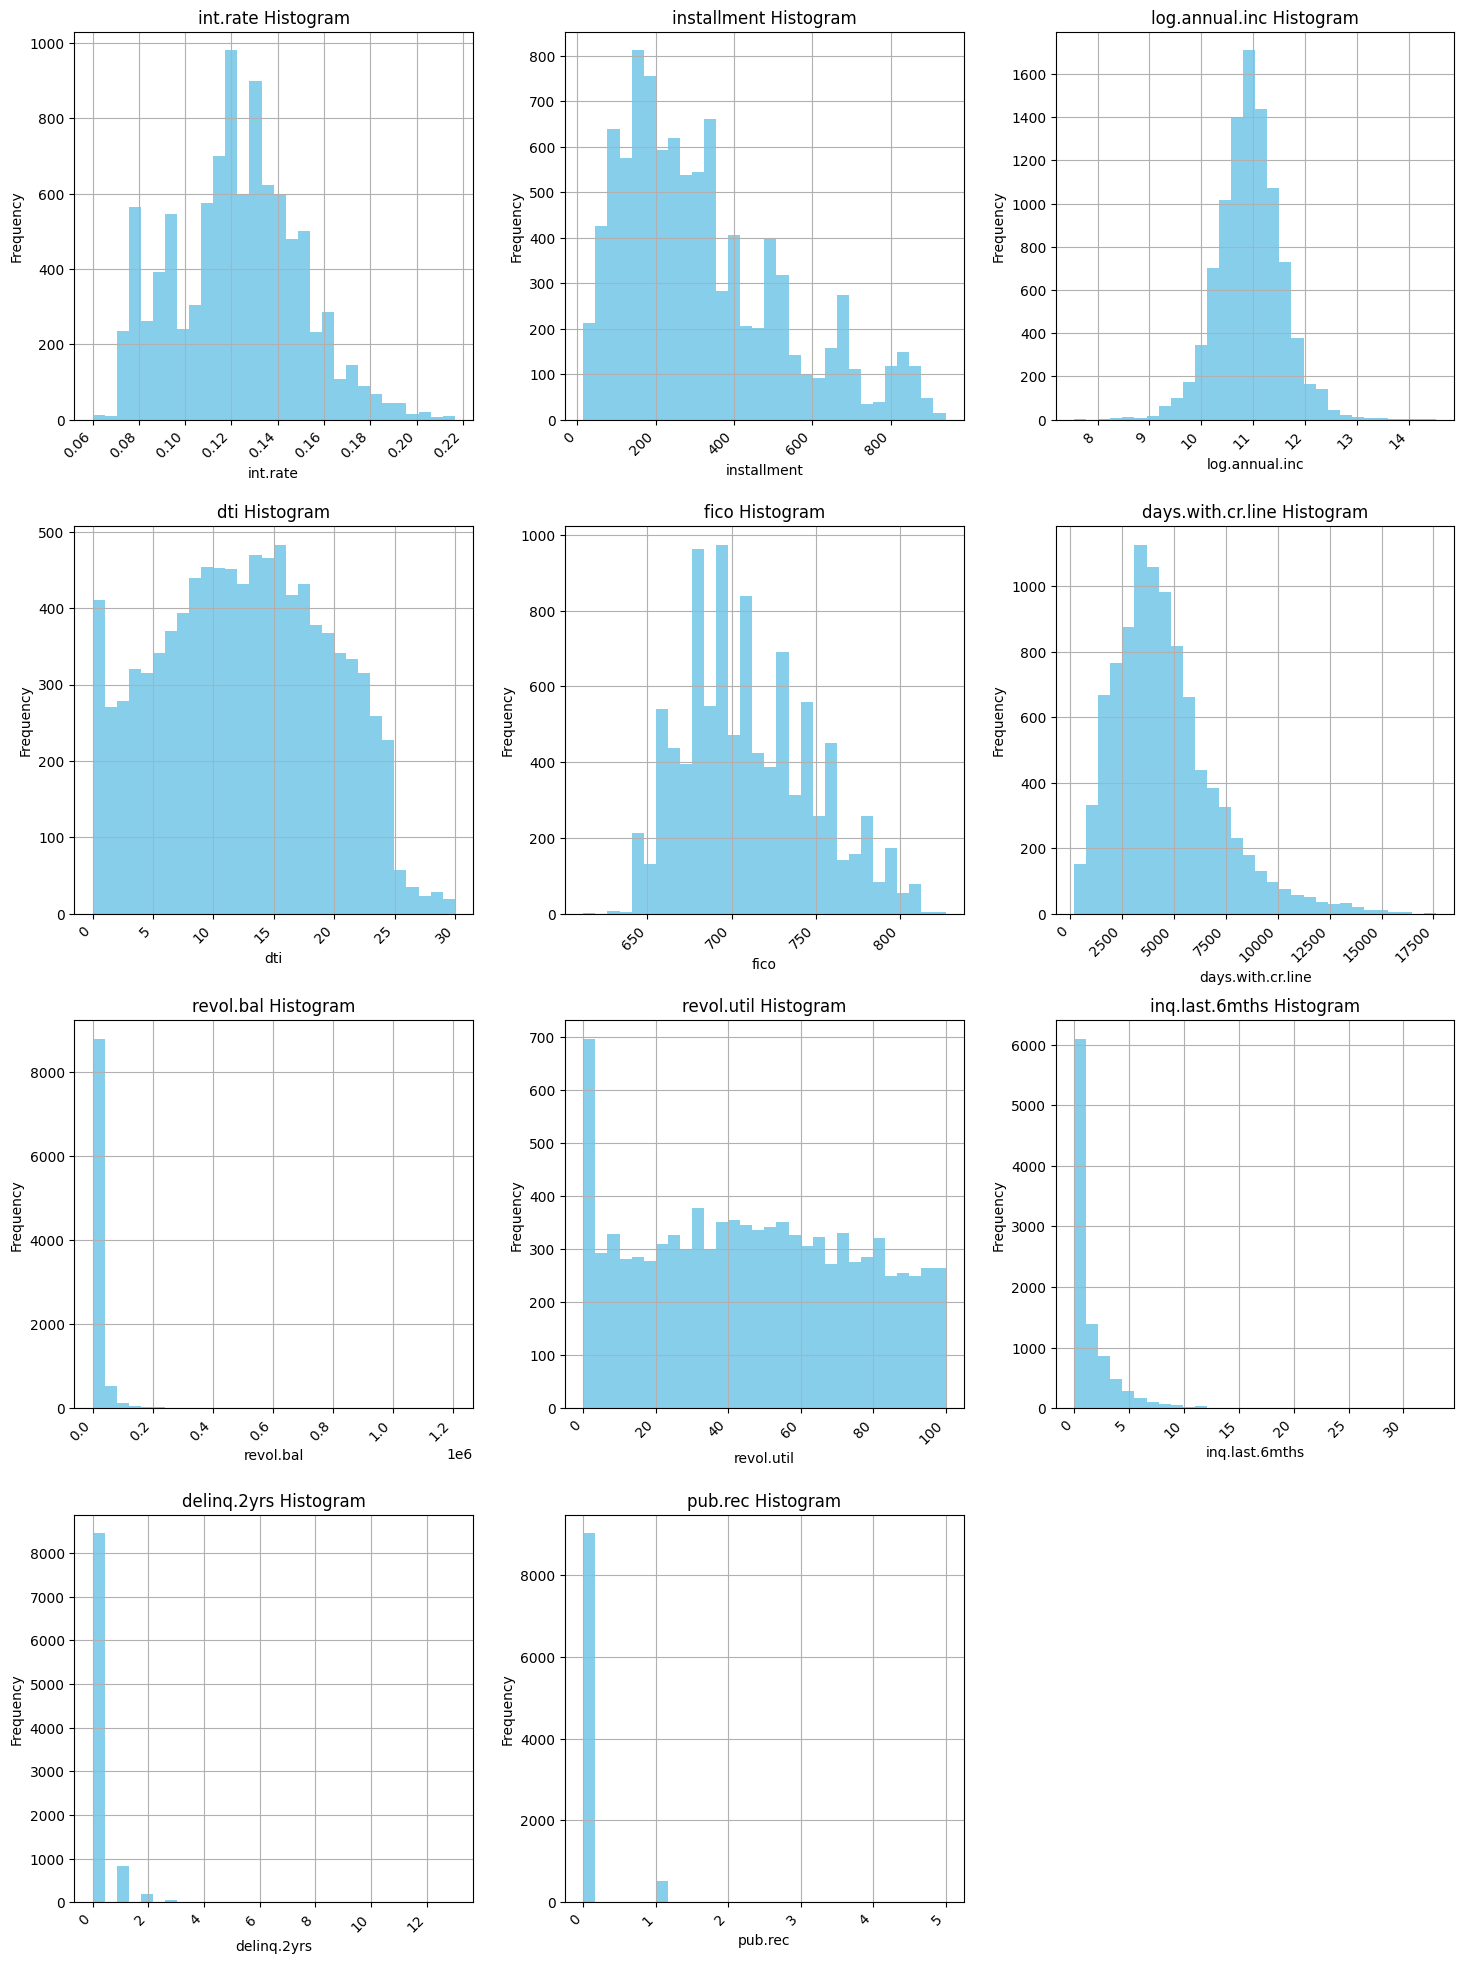

In [12]:
import matplotlib.pyplot as plt
import math

# Filter numerical features (int and float types)
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns for subplots
num_features = len(numerical_features.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

# Set figure size
plt.figure(figsize=(15, 5 * num_rows))

# Iterate over each numerical feature
for i, column in enumerate(numerical_features.columns, start=1):
    # Create subplot for each feature
    plt.subplot(num_rows, num_cols, i)

    # Plot histogram
    df[column].hist(color='skyblue', bins=30)

    # Add title and labels
    plt.title(f'{column} Histogram', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout(pad=2.0, h_pad=1.0)

# Show plot
plt.show()

Logarithm Transformation of 'revol.bal' Feature

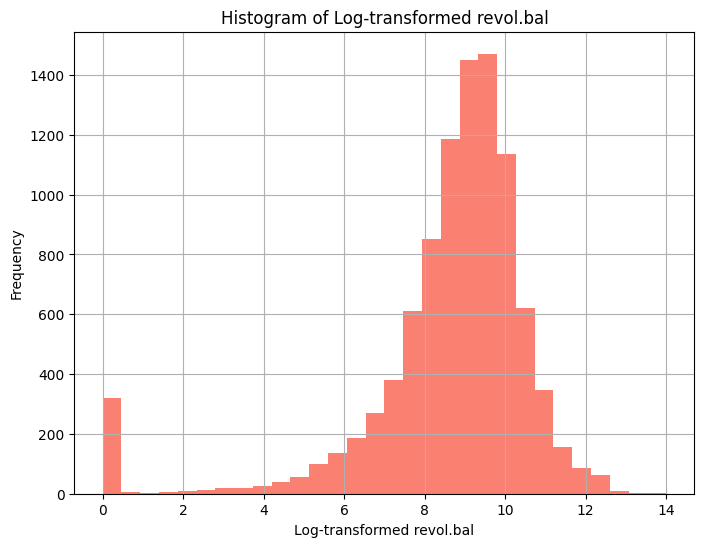

In [13]:
import numpy as np

# Apply logarithm transformation to 'revol.bal'
df['revol.bal_log'] = np.log1p(df['revol.bal'])

# Plot histogram of the transformed data
plt.figure(figsize=(8, 6))
df['revol.bal_log'].hist(color='salmon', bins=30)
plt.title('Histogram of Log-transformed revol.bal')
plt.xlabel('Log-transformed revol.bal')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix for Numerical Features

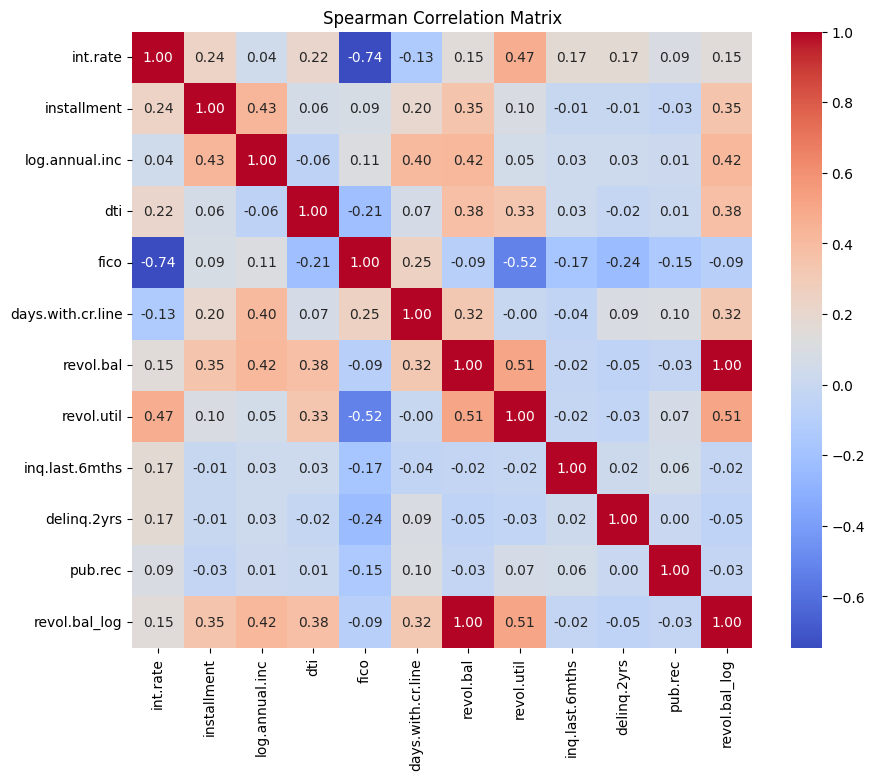

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numerical features (int and float types)
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate Spearman correlation matrix
spearman_corr_matrix = numerical_features.corr(method='spearman')

# Set figure size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Spearman Correlation Matrix')

# Show plot
plt.show()

Spearman Statistical Test for Correlations

In [15]:
from scipy.stats import spearmanr

# Run Spearman correlation test
spearman_corr_test_results = {}

# Iterate over each pair of numerical features
for feature1 in numerical_features.columns:
    for feature2 in numerical_features.columns:
        if feature1 != feature2:  # Exclude correlations between a feature and itself
            # Run Spearman correlation test
            corr, p_value = spearmanr(numerical_features[feature1], numerical_features[feature2])
            spearman_corr_test_results[(feature1, feature2)] = (corr, p_value)

# Display Spearman correlation test results
print("Spearman Correlation Test Results:")
for (feature1, feature2), (corr, p_value) in spearman_corr_test_results.items():
    if abs(corr) > 0.5 and p_value < 0.05:  # Filter higher correlations
        print(f"{feature1} - {feature2}: Correlation = {corr:.3f}, p-value = {p_value:.3f}")

Spearman Correlation Test Results:
int.rate - fico: Correlation = -0.745, p-value = 0.000
fico - int.rate: Correlation = -0.745, p-value = 0.000
fico - revol.util: Correlation = -0.520, p-value = 0.000
revol.bal - revol.util: Correlation = 0.515, p-value = 0.000
revol.bal - revol.bal_log: Correlation = 1.000, p-value = 0.000
revol.util - fico: Correlation = -0.520, p-value = 0.000
revol.util - revol.bal: Correlation = 0.515, p-value = 0.000
revol.util - revol.bal_log: Correlation = 0.515, p-value = 0.000
revol.bal_log - revol.bal: Correlation = 1.000, p-value = 0.000
revol.bal_log - revol.util: Correlation = 0.515, p-value = 0.000
